In [5]:
import re
from typing import Dict, List, Optional, Text, Tuple
import matplotlib.pyplot as plt
from matplotlib import colors
import tensorflow as tf
from tensorflow import add
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Dropout, MaxPooling2D, UpSampling2D, Concatenate, BatchNormalization, Add
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import json

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# !ls "/content/drive/MyDrive/ffmodel/"
# file_path = "/content/drive/MyDrive/ffmodel/"
# model_ce2_path = "/content/drive/MyDrive/ffmodel/model_checkpoint_ce2.keras"
# model_mse_path = "/content/drive/MyDrive/ffmodel/model_checkpoint_mse.keras"


!ls "/content/drive/MyDrive/Sproj_streamlit/"
file_path = "/content/drive/MyDrive/Sproj_streamlit/"
model_ce2_path = "/content/drive/MyDrive/Sproj_streamlit/model_checkpoint_ce2.keras"
model_mse_path = "/content/drive/MyDrive/Sproj_streamlit/model_checkpoint_mse.keras"

model_checkpoint_ce2.keras  model_checkpoint_mse.keras	test_input_data.json
model_checkpoint_ce.keras   streamlit_app.ipynb


In [15]:
from keras.models import load_model

model = load_model(model_mse_path)
ce_model = load_model(model_ce2_path)

In [18]:
with open(file_path + 'test_input_data.json', 'r') as json_file:
    json_data = json.load(json_file)

# input_list = json.loads(json_data)
input_list = json_data
print(input_list)
input = np.array(input_list)
print(input.shape)
prev_fire_mask = input[0,:,:,-1]
print(prev_fire_mask.shape)
with open(file_path + 'region_info.json', 'r') as json_file:
    json_data = json.load(json_file)

input_list = json_data
# region_input = input_list.to
print(input_list)

for key in input_list:
  print(key)

wind_dir = np.array(input_list['wind_direction'])
wind_spd = np.array(input_list['wind_speed'])
min_temp = np.array(input_list['min_temperature'])
max_temp = np.array(input_list['max_temperature'])
humidity = np.array(input_list['humidity'])
precip = np.array(input_list['precipitation'])
vege = np.array(input_list['vegetation'])
elev = np.array(input_list['elevation'])
pop_density = np.array(input_list['population_density'])
drought_index = np.array(input_list['drought_index'])
erc = np.array(input_list['energy_release_component'])

wind_dir = wind_dir.reshape(32, 32)
wind_spd = wind_spd.reshape(32, 32)
min_temp = min_temp.reshape(32, 32)
max_temp = max_temp.reshape(32, 32)
humidity = humidity.reshape(32, 32)
precip = precip.reshape(32, 32)
vege = vege.reshape(32, 32)
elev = elev.reshape(32, 32)
pop_density = pop_density.reshape(32, 32)
drought_index = drought_index.reshape(32, 32)
erc = erc.reshape(32, 32)

inputs = [elev, wind_dir, wind_spd, min_temp, max_temp, humidity, precip, drought_index, vege, pop_density, erc, prev_fire_mask]
inputs = np.array(inputs)
inputs = inputs.transpose(1, 2, 0)
coordinates = input_list['coordinates']
inputs = np.expand_dims(inputs, axis=0)
print(inputs.shape)

# region_input = np.array(input_list)
# print(region_input)

# with open(file_path + 'test_label_data.json', 'r') as json_file:
#     json_data = json.load(json_file)


# # label_list = json.loads(json_data)
# label_list = json_data
# print(label_list)
# label = np.array(label_list)
# print(label.shape)

[[[[1002.0, 33.27626419067383, 4.1345062255859375, 287.2908020019531, 310.2669677734375, 0.006102265324443579, 0.0, -2.336158514022827, 3604.0, 0.03553067147731781, 75.70858001708984, 0.0], [1021.0, 33.952789306640625, 4.121321201324463, 287.3239440917969, 310.24664306640625, 0.006123162340372801, 0.0, -2.3544490337371826, 3961.0, 0.0, 75.62196350097656, 0.0], [1023.0, 34.630897521972656, 4.108397960662842, 287.3564453125, 310.22491455078125, 0.006144112907350063, 0.0, -2.3640072345733643, 4315.0, 0.0, 75.53280639648438, 0.0], [1051.0, 35.302486419677734, 4.095799922943115, 287.3878479003906, 310.2018737792969, 0.006164950784295797, 0.0, -2.3683865070343018, 4717.0, 0.0, 75.44094848632812, 0.0], [1046.0, 35.95945739746094, 4.083590984344482, 287.4177551269531, 310.177490234375, 0.006185512058436871, 0.0, -2.3699276447296143, 4717.0, 0.0, 75.34622955322266, 0.0], [1045.0, 36.593711853027344, 4.071834087371826, 287.4457092285156, 310.15179443359375, 0.006205632351338863, 0.0, -2.37009334

In [19]:
def predict_mse_model(model, x):
    prediction = model.predict(x)
    print(prediction.shape)
    prediction = np.where(prediction < -0.1, -1, np.where(prediction < 0.1, 0, 1))
    prediction = np.squeeze(prediction, axis=-1)
    return prediction

def predict_ce_model(model, x):
    prediction = ce_model.predict(x)
    print(prediction.shape)
    prediction = np.argmax(prediction, axis=-1)
    print(prediction.shape)
    return prediction

prediction = predict_mse_model(model, inputs)
# prediction = predict_ce_model(ce_model, input)
print(type(prediction))
print(prediction)

1/1 [==============================] - 2s 2s/step
(1, 32, 32, 1)
<class 'numpy.ndarray'>
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [20]:
TITLES = [
  'Elevation',
  'Wind\ndirection',
  'Wind\nvelocity',
  'Min\ntemp',
  'Max\ntemp',
  'Humidity',
  'Precip',
  'Drought',
  'Vegetation',
  'Population\ndensity',
  'Energy\nrelease\ncomponent',
  'Previous\nfire\nmask',
  'Fire\nmask',
  'Predicted\nfire\nmask'
]

In [21]:
# Number of rows of data samples to plot
n_rows = 1
# Number of data variables
n_features = input.shape[3]
# Variables for controllong the color map for the fire masks
CMAP = colors.ListedColormap(['black', 'silver', 'orangered'])
BOUNDS = [-1, -0.1, 0.1, 1]
OBOUNDS = [-1, -0.1, 0.1, 1]
ONORM = colors.BoundaryNorm(OBOUNDS, CMAP.N)
NORM = colors.BoundaryNorm(BOUNDS, CMAP.N)

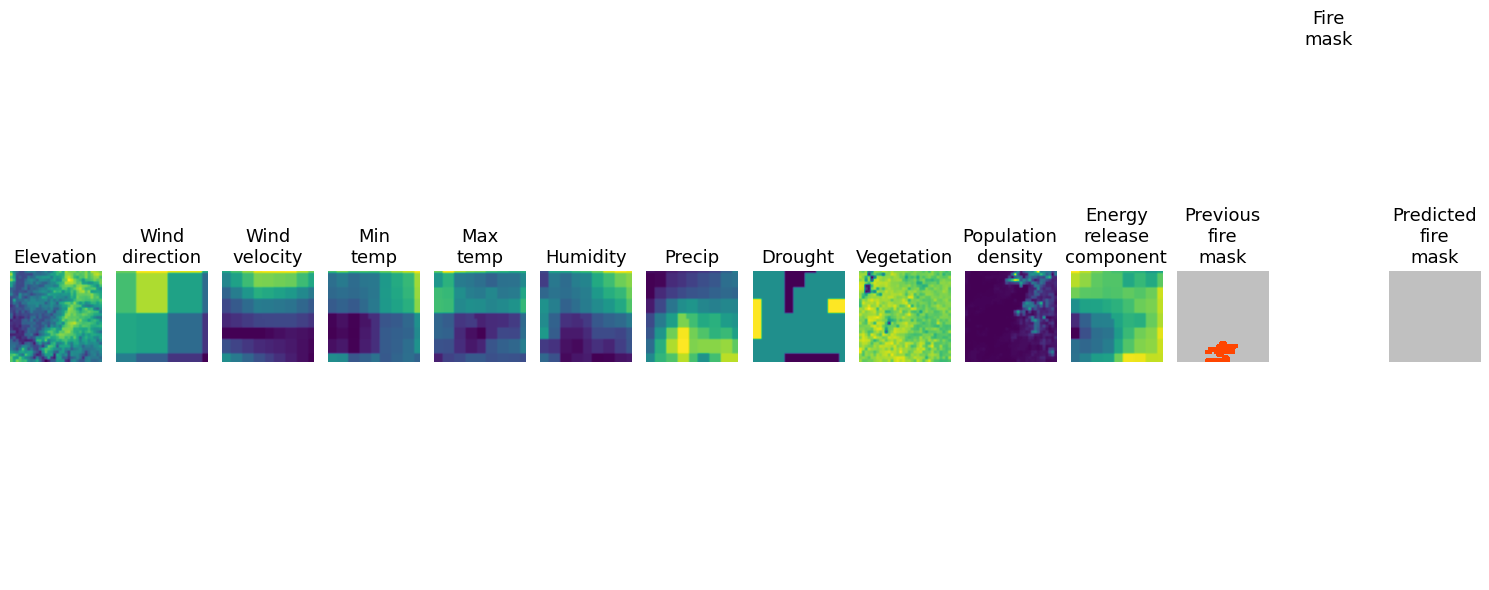

In [22]:
fig = plt.figure(figsize=(15,6))


for i in range(n_rows):
  for j in range(n_features + 2):
    plt.subplot(n_rows, n_features + 2, i * (n_features + 2) + j + 1)
    if i == 0:
      plt.title(TITLES[j], fontsize=13)
    if j < n_features - 1:
      plt.imshow(inputs[i, :, :, j], cmap='viridis')
    if j == n_features - 1:
      plt.imshow(inputs[i, :, :, -1], cmap=CMAP, norm=NORM)
    if j == n_features:
      pass
    if j == n_features+1:
      plt.imshow(prediction[i, :, :], cmap=CMAP, norm=ONORM)
    plt.axis('off')
plt.tight_layout()

In [23]:
# %%writefile app.py
# import streamlit as st
# import numpy as np
# import json
# from tensorflow.keras.models import load_model
# import matplotlib.pyplot as plt
# from matplotlib import colors

# # Load the Keras model
# model_mse_path = "/content/drive/MyDrive/ffmodel/model_checkpoint_mse.keras"
# model = load_model(model_mse_path)

# def preprocess_input_data(uploaded_test_input_data, uploaded_region_info):
#     # Read the content of the uploaded files
#     test_input_data_content = uploaded_test_input_data.read()
#     region_info_content = uploaded_region_info.read()

#     # Parse the JSON content
#     test_input_data = json.loads(test_input_data_content)
#     region_info = json.loads(region_info_content)

#     # Extracting the 'prev_fire_mask' from the test input data
#     input_array = np.array(test_input_data)
#     prev_fire_mask = input_array[0, :, :, -1]

#     # Extracting data from region_info.json
#     wind_dir = np.array(region_info['wind_direction'])
#     wind_spd = np.array(region_info['wind_speed'])
#     min_temp = np.array(region_info['min_temperature'])
#     max_temp = np.array(region_info['max_temperature'])
#     humidity = np.array(region_info['humidity'])
#     precip = np.array(region_info['precipitation'])
#     vege = np.array(region_info['vegetation'])
#     elev = np.array(region_info['elevation'])
#     pop_density = np.array(region_info['population_density'])
#     drought_index = np.array(region_info['drought_index'])
#     erc = np.array(region_info['energy_release_component'])

#     # Reshaping arrays
#     wind_dir = wind_dir.reshape(32, 32)
#     wind_spd = wind_spd.reshape(32, 32)
#     min_temp = min_temp.reshape(32, 32)
#     max_temp = max_temp.reshape(32, 32)
#     humidity = humidity.reshape(32, 32)
#     precip = precip.reshape(32, 32)
#     vege = vege.reshape(32, 32)
#     elev = elev.reshape(32, 32)
#     pop_density = pop_density.reshape(32, 32)
#     drought_index = drought_index.reshape(32, 32)
#     erc = erc.reshape(32, 32)

#     # Creating inputs array
#     inputs = [elev, wind_dir, wind_spd, min_temp, max_temp, humidity,
#                        precip, drought_index, vege, pop_density, erc, prev_fire_mask]
#     inputs = np.array(inputs)
#     inputs = inputs.transpose(1, 2, 0)
#     inputs = np.expand_dims(inputs, axis=0)  # Add extra dimension
#     return inputs


# def predict_fire_masks(inputs, model):
#     prediction = model.predict(inputs)
#     fire_masks = np.where(prediction < -0.1, -1, np.where(prediction < 0.1, 0, 1))
#     return fire_masks

# def display_results(inputs, fire_masks):
#     # Display inputs and predicted fire masks
#     fig, axes = plt.subplots(1, inputs.shape[-1] + 2, figsize=(15, 5))
#     titles = ['Elev.', 'W dire.', 'W. spe.', 'Min T', 'Max T',
#               'Hdty', 'Ppt', 'Dgt Idx', 'Veg.', 'PD',
#               'ERC', 'PFM', 'FM', 'Prediction']

#     for i, (ax, title) in enumerate(zip(axes, titles)):
#         if i < inputs.shape[-1]:
#             ax.imshow(inputs[0, ..., i], cmap='viridis')  # Changed indexing to select the first sample
#         elif i == inputs.shape[-1]:
#             ax.imshow(inputs[0, ..., -1], cmap=colors.ListedColormap(['black', 'silver', 'orangered']), norm=colors.BoundaryNorm([-1, -0.1, 0.1, 1], 3))  # Changed indexing
#         else:
#             ax.imshow(fire_masks[0], cmap=colors.ListedColormap(['black', 'silver', 'orangered']), norm=colors.BoundaryNorm([-1, -0.1, 0.1, 1], 3))
#         ax.set_title(title)

#         ax.axis('off')

#     st.pyplot(fig)






# def main():
#     st.title("Fire Mask Prediction App")

#     uploaded_test_input_data = st.file_uploader("Upload test_input_data.json", type='json')
#     uploaded_region_info = st.file_uploader("Upload region_info.json", type='json')

#     if uploaded_test_input_data is not None and uploaded_region_info is not None:
#         st.write("Files uploaded successfully!")

#         inputs = preprocess_input_data(uploaded_test_input_data, uploaded_region_info)
#         fire_masks = predict_fire_masks(inputs, model)

#         display_results(inputs, fire_masks)

# if __name__ == '__main__':
#     main()


In [24]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [58]:
%%writefile app.py
import streamlit as st
import numpy as np
import json
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib import colors
from io import BytesIO
import base64

# Load the Keras model
model_mse_path = "/content/drive/MyDrive/Sproj_streamlit/model_checkpoint_mse.keras"
model = load_model(model_mse_path)

def preprocess_input_data(uploaded_test_input_data, uploaded_region_info):
    # Read the content of the uploaded files
    test_input_data_content = uploaded_test_input_data.read()
    region_info_content = uploaded_region_info.read()

    # Parse the JSON content
    test_input_data = json.loads(test_input_data_content)
    region_info = json.loads(region_info_content)

    # Extracting the 'prev_fire_mask' from the test input data
    input_array = np.array(test_input_data)
    prev_fire_mask = input_array[0, :, :, -1]

    # Extracting data from region_info.json
    wind_dir = np.array(region_info['wind_direction'])
    wind_spd = np.array(region_info['wind_speed'])
    min_temp = np.array(region_info['min_temperature'])
    max_temp = np.array(region_info['max_temperature'])
    humidity = np.array(region_info['humidity'])
    precip = np.array(region_info['precipitation'])
    vege = np.array(region_info['vegetation'])
    elev = np.array(region_info['elevation'])
    pop_density = np.array(region_info['population_density'])
    drought_index = np.array(region_info['drought_index'])
    erc = np.array(region_info['energy_release_component'])

    # Reshaping arrays
    wind_dir = wind_dir.reshape(32, 32)
    wind_spd = wind_spd.reshape(32, 32)
    min_temp = min_temp.reshape(32, 32)
    max_temp = max_temp.reshape(32, 32)
    humidity = humidity.reshape(32, 32)
    precip = precip.reshape(32, 32)
    vege = vege.reshape(32, 32)
    elev = elev.reshape(32, 32)
    pop_density = pop_density.reshape(32, 32)
    drought_index = drought_index.reshape(32, 32)
    erc = erc.reshape(32, 32)

    # Creating inputs array
    inputs = [elev, wind_dir, wind_spd, min_temp, max_temp, humidity,
                       precip, drought_index, vege, pop_density, erc, prev_fire_mask]
    inputs = np.array(inputs)
    inputs = inputs.transpose(1, 2, 0)
    inputs = np.expand_dims(inputs, axis=0)  # Add extra dimension
    inputs = input_array
    return inputs


def predict_fire_masks(inputs, model):
    prediction = model.predict(inputs)
    fire_masks = np.where(prediction < -0.1, -1, np.where(prediction < 0.1, 0, 1))
    return fire_masks

def display_results(inputs, fire_masks):
    # Display inputs and predicted fire masks
    fig, axes = plt.subplots(1, inputs.shape[-1] + 2, figsize=(15, 5))
    # titles = ['Elev.', 'W dire.', 'W. spe.', 'Min T', 'Max T',
    #           'Hdty', 'Ppt', 'Dgt Idx', 'Veg.', 'PD',
    #           'ERC', 'PFM', 'FM', 'Prediction']
    titles = ['Elevation', 'Wind direction', 'Wind speed', 'Min Temp.', 'Max Temp.',
              'Humidity', 'Precipitate', 'Drought index', 'Vegetation', 'Population Density',
              'Energy Release Component', 'Previous Fire Mask', 'Fire Mask', 'Prediction']

    for i, (ax, title) in enumerate(zip(axes, titles)):
        if i < inputs.shape[-1]:
            ax.imshow(inputs[0, ..., i], cmap='viridis')  # Changed indexing to select the first sample
        elif i == inputs.shape[-1]:
            ax.imshow(inputs[0, ..., -1], cmap=colors.ListedColormap(['black', 'silver', 'orangered']), norm=colors.BoundaryNorm([-1, -0.1, 0.1, 1], 3))  # Changed indexing
        else:
            ax.imshow(fire_masks[0], cmap=colors.ListedColormap(['black', 'silver', 'orangered']), norm=colors.BoundaryNorm([-1, -0.1, 0.1, 1], 3))
        ax.set_title('\n'.join(title.split()))  # Split title into multiple lines

        ax.axis('off')
    st.pyplot(fig)

    # Download the visualization as a JPEG file
    buffer = BytesIO()
    plt.savefig(buffer, format='jpeg')
    buffer.seek(0)
    b64 = base64.b64encode(buffer.read()).decode()
    href = f'<a href="data:file/jpeg;base64,{b64}" download="fire_prediction.jpg">Download Visualization</a>'
    st.markdown(href, unsafe_allow_html=True)


def main():
    st.title("LUMS Forest Fire Observatory: Results")

    uploaded_test_input_data = st.file_uploader("Upload test_input_data.json", type='json')
    uploaded_region_info = st.file_uploader("Upload region_info.json", type='json')

    if uploaded_test_input_data is not None and uploaded_region_info is not None:
        st.write("Files uploaded successfully!")

        inputs = preprocess_input_data(uploaded_test_input_data, uploaded_region_info)
        fire_masks = predict_fire_masks(inputs, model)

        display_results(inputs, fire_masks)

if __name__ == '__main__':
    main()


Overwriting app.py


In [33]:
!pip install streamlit
!pip install requests

In [27]:
# !streamlit run app.py

In [55]:
import requests

response = requests.get("https://loca.lt/mytunnelpassword")
print(response.text)


104.154.44.153


In [59]:
# # ngrok http 8501
!streamlit run app.py & npx localtunnel --port 8501 --subdomain generator





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.154.44.153:8501

npx: installed 22 in 2.06s
your url is: https://generator.loca.lt
2024-05-13 08:34:25.279182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 08:34:25.279229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 08:34:25.281004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 08:34:26.515538: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-13 08:34:28.650970: W ten